In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

# setting a default figure size for timeseries plots

rcParams['figure.figsize'] = 12,4

# importing and cleaning the data

df = pd.read_csv('international-airline-passengers.csv')

df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'passengers_thousands'}, inplace = True)
df.dropna(inplace = True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

df.head()

,passengers_thousands
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


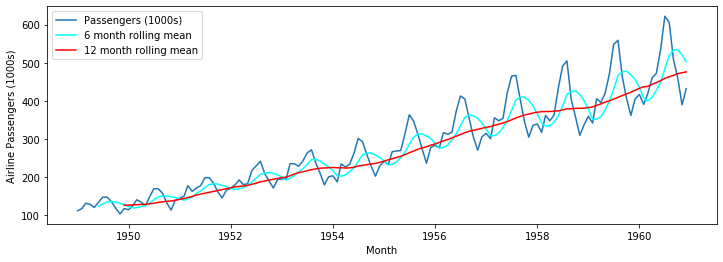

In [30]:
# plotting rolling means with 6 month and 12 month windows

y = df['passengers_thousands'].rolling(window = 6).mean()
y1 = df['passengers_thousands'].rolling(window = 12).mean()

plt.plot(df.index,df['passengers_thousands'], label = 'Passengers (1000s)')
plt.plot(df.index, y, label = '6 month rolling mean', color = 'cyan')
plt.plot(df.index,y1, label = '12 month rolling mean', color = 'red')
plt.xlabel('Month')
plt.ylabel('Airline Passengers (1000s)')
plt.legend()
plt.show()

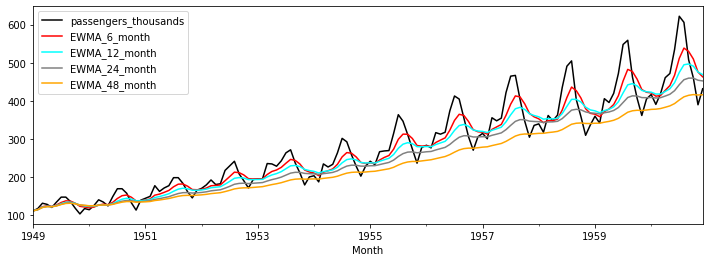

In [29]:
# plotting and 6/12/24/48 month exponentially weighted moving average

df['EWMA_6_month'] = df['passengers_thousands'].ewm(span = 6).mean()
df['EWMA_12_month'] = df['passengers_thousands'].ewm(span = 12).mean()
df['EWMA_24_month'] = df['passengers_thousands'].ewm(span = 24).mean()
df['EWMA_48_month'] = df['passengers_thousands'].ewm(span = 48).mean()

df.plot(color = ['black', 'red', 'cyan', 'gray', 'orange'])